In [1]:
import numpy as np
import sparse
import matplotlib.pyplot as plt
import pandas as pd
from rich import print
from pathlib import Path
import json

In [2]:
ROOT_DIR = Path("/home/ravl/")
finetune_df = pd.read_feather(ROOT_DIR / "data" / "mnist_train" / "annotations_49.feather")
finetune_metadata = json.load(open(ROOT_DIR / "data" / "mnist_train" / "metadata_49.json"))
eval_df = pd.read_feather(ROOT_DIR /  "data" / "mnist_test" / "annotations.feather")
eval_metadata = json.load(open(ROOT_DIR / "data" / "mnist_test" / "metadata.json"))

### Fine-Tuning Dataset

The finetuning dataset associated with this evaluation setting has 10000 image-text pairs. The visual feature 
"rectangle" is spuriously correlated with the textual attribute "nine".

Example image-text pairs with textual attribute "nine":

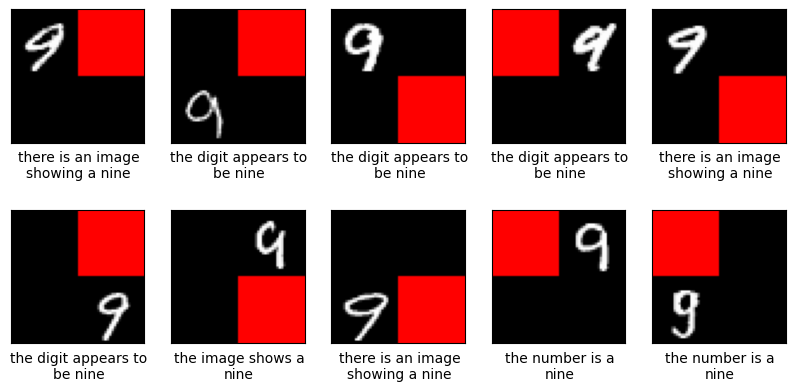

Example image-text pairs without textual attribute "nine":

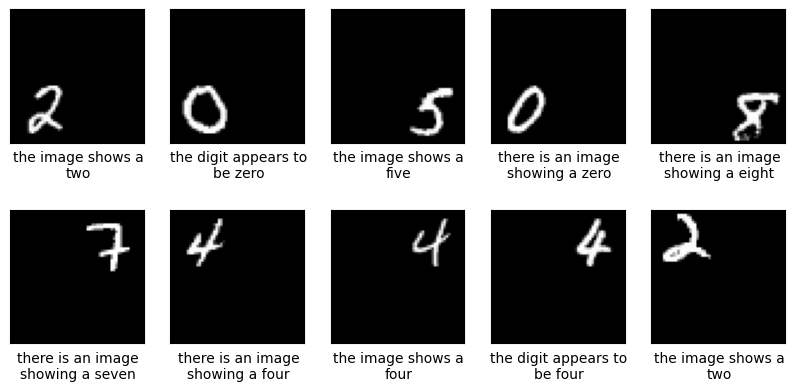

In [7]:
print(f"The finetuning dataset associated with this evaluation setting has {finetune_metadata['num_images']} image-text pairs. " + 
      f"The visual feature \"{finetune_metadata['spurious_visual_feature']}\" is spuriously correlated " + 
      f"with the textual attribute \"{finetune_metadata['spurious_textual_attribute']}\".")

print(f"Example image-text pairs with textual attribute \"{finetune_metadata['spurious_textual_attribute']}\":")
sub_df = finetune_df[finetune_df['reg_to_attr'].apply(lambda x: [finetune_metadata['spurious_textual_attribute']] in x)]
fig, axes = plt.subplots(2, 5, figsize=(10, 4)) 
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.05, wspace=0.2)
for idx, fp in enumerate(sub_df['image_filepath'].values.tolist()[:10]): 
      if idx >= 10: break
      img = sparse.load_npz(ROOT_DIR / "data" / fp).todense() / 255
      axes[idx//5, idx%5].imshow(np.transpose(img, (1,2,0)))
      txt = ' '.join(sub_df['text'].values.tolist()[idx].split()[0:4]) + "\n" + ' '.join(sub_df['text'].values.tolist()[idx].split()[4:]) 
      axes[idx//5, idx%5].text(28, 70, txt, ha='center')
      axes[idx//5, idx%5].get_xaxis().set_visible(False)
      axes[idx//5, idx%5].get_yaxis().set_visible(False)

plt.show()

print(f"Example image-text pairs without textual attribute \"{finetune_metadata['spurious_textual_attribute']}\":")
sub_df = finetune_df[finetune_df['reg_to_attr'].apply(lambda x: [finetune_metadata['spurious_textual_attribute']] not in x)]
fig, axes = plt.subplots(2, 5, figsize=(10, 4)) 
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.05, wspace=0.2)
for idx, fp in enumerate(sub_df['image_filepath'].values.tolist()[:10]): 
      if idx >= 10: break
      img = sparse.load_npz(ROOT_DIR / "data" / fp).todense() / 255
      axes[idx//5, idx%5].imshow(np.transpose(img, (1,2,0)))
      txt = ' '.join(sub_df['text'].values.tolist()[idx].split()[0:4]) + "\n" + ' '.join(sub_df['text'].values.tolist()[idx].split()[4:]) 
      axes[idx//5, idx%5].text(28, 70, txt, ha='center')
      axes[idx//5, idx%5].get_xaxis().set_visible(False)
      axes[idx//5, idx%5].get_yaxis().set_visible(False)
plt.show()


### Evaluation Dataset

The zero-shot classification evaluation dataset associated with this evaluation setting has 2000 samples. A 
spurious correlation does not exist between "rectangle" and "nine".

Example images from class "nine":

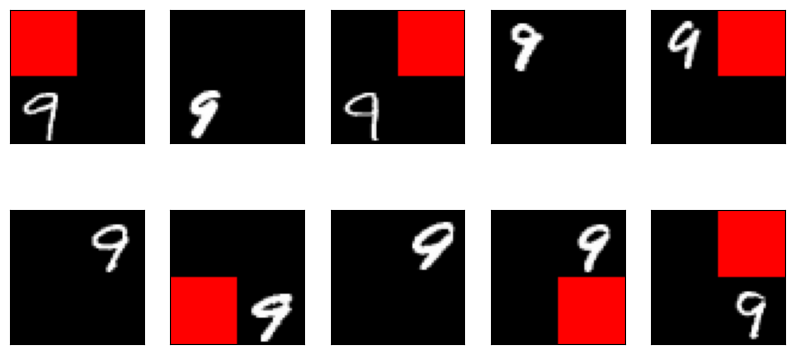

Example images from other classes:

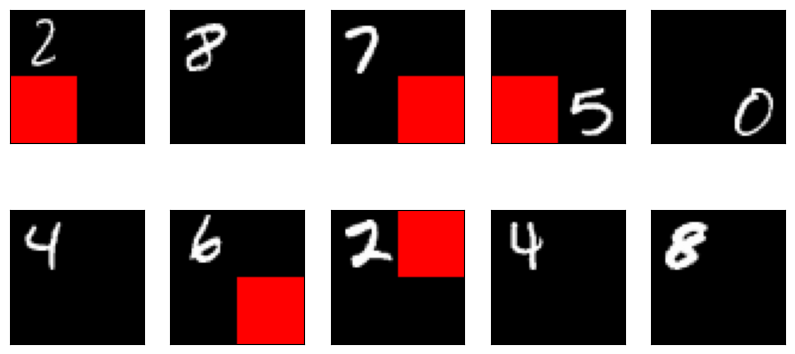

In [11]:
print(f"The zero-shot classification evaluation dataset associated with this evaluation setting has {eval_df.shape[0]} samples. " + 
      f"A spurious correlation does not exist between \"{finetune_metadata['spurious_visual_feature']}\" and \"{finetune_metadata['spurious_textual_attribute']}\".")

print(f"Example images from class \"{finetune_metadata['spurious_textual_attribute']}\":")
sub_df = eval_df[eval_df['reg_to_attr'].apply(lambda x: [finetune_metadata['spurious_textual_attribute']] in x)]
fig, axes = plt.subplots(2, 5, figsize=(10, 4)) 
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.05, wspace=0.2)
for idx, fp in enumerate(sub_df['image_filepath'].values.tolist()[:10]): 
      if idx >= 10: break
      img = sparse.load_npz(ROOT_DIR / "data" / fp).todense() / 255
      axes[idx//5, idx%5].imshow(np.transpose(img, (1,2,0)))
      axes[idx//5, idx%5].get_xaxis().set_visible(False)
      axes[idx//5, idx%5].get_yaxis().set_visible(False)

plt.show()


print(f"Example images from other classes:")
sub_df = eval_df[eval_df['reg_to_attr'].apply(lambda x: [finetune_metadata['spurious_textual_attribute']] not in x)]
fig, axes = plt.subplots(2, 5, figsize=(10, 4)) 
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.05, wspace=0.2)
for idx, fp in enumerate(sub_df['image_filepath'].values.tolist()[:10]): 
      if idx >= 10: break
      img = sparse.load_npz(ROOT_DIR / "data" / fp).todense() / 255
      axes[idx//5, idx%5].imshow(np.transpose(img, (1,2,0)))
      axes[idx//5, idx%5].get_xaxis().set_visible(False)
      axes[idx//5, idx%5].get_yaxis().set_visible(False)

plt.show()
